# **New York City Taxi Trip Data**

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

fig_path = '/content/drive/MyDrive/DataMining/Figures/'
data_path = '/content/drive/MyDrive/DataMining/Dataset/'

Mounted at /content/drive


In [5]:
data = pd.read_csv(data_path + "Taxi_Trip_Transformed_Data.csv")
zone = pd.read_csv(data_path + "taxi_zone_geo.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319926 entries, 0 to 8319925
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   trip_distance            float64
 2   rate_code                int64  
 3   store_and_fwd_flag       int64  
 4   payment_type             int64  
 5   fare_amount              float64
 6   extra                    float64
 7   mta_tax                  float64
 8   tip_amount               float64
 9   tolls_amount             float64
 10  imp_surcharge            float64
 11  total_amount             float64
 12  pickup_location_id       int64  
 13  dropoff_location_id      int64  
 14  year                     int64  
 15  month                    int64  
 16  day                      int64  
 17  day_of_week              int64  
 18  hour_of_day              int64  
 19  trip_duration            float64
 20  calculated_total_amount  float64
 21  driving_

In [ ]:
# supprimer le premier colone
data = data.iloc[:, 1:]
# Afficher les premier lignes
data.head()

,Unnamed: 0.1,Unnamed: 0,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,...,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,driving_speed,tipping_rate
0,0,3,16.97,1,0,1,0.000264,0.000000,0.023256,0.013294,...,138,2018,3,29,3,13,3317.0,61.67,18.417847,0.090968
1,1,4,14.45,1,0,1,0.000243,0.000000,0.023256,0.024668,...,138,2018,3,29,3,14,3648.0,62.47,14.259868,0.166640
2,2,5,11.60,1,0,1,0.000224,0.000000,0.023256,0.034526,...,138,2018,3,29,3,14,3540.0,63.13,11.796610,0.230794
3,3,10,5.10,1,0,1,0.000141,0.049505,0.023256,0.013389,...,33,2018,3,29,3,16,2585.0,33.95,7.102515,0.166421
4,4,12,11.11,1,0,1,0.000243,0.049505,0.023256,0.025142,...,138,2018,3,29,3,16,4521.0,63.67,8.846715,0.166640


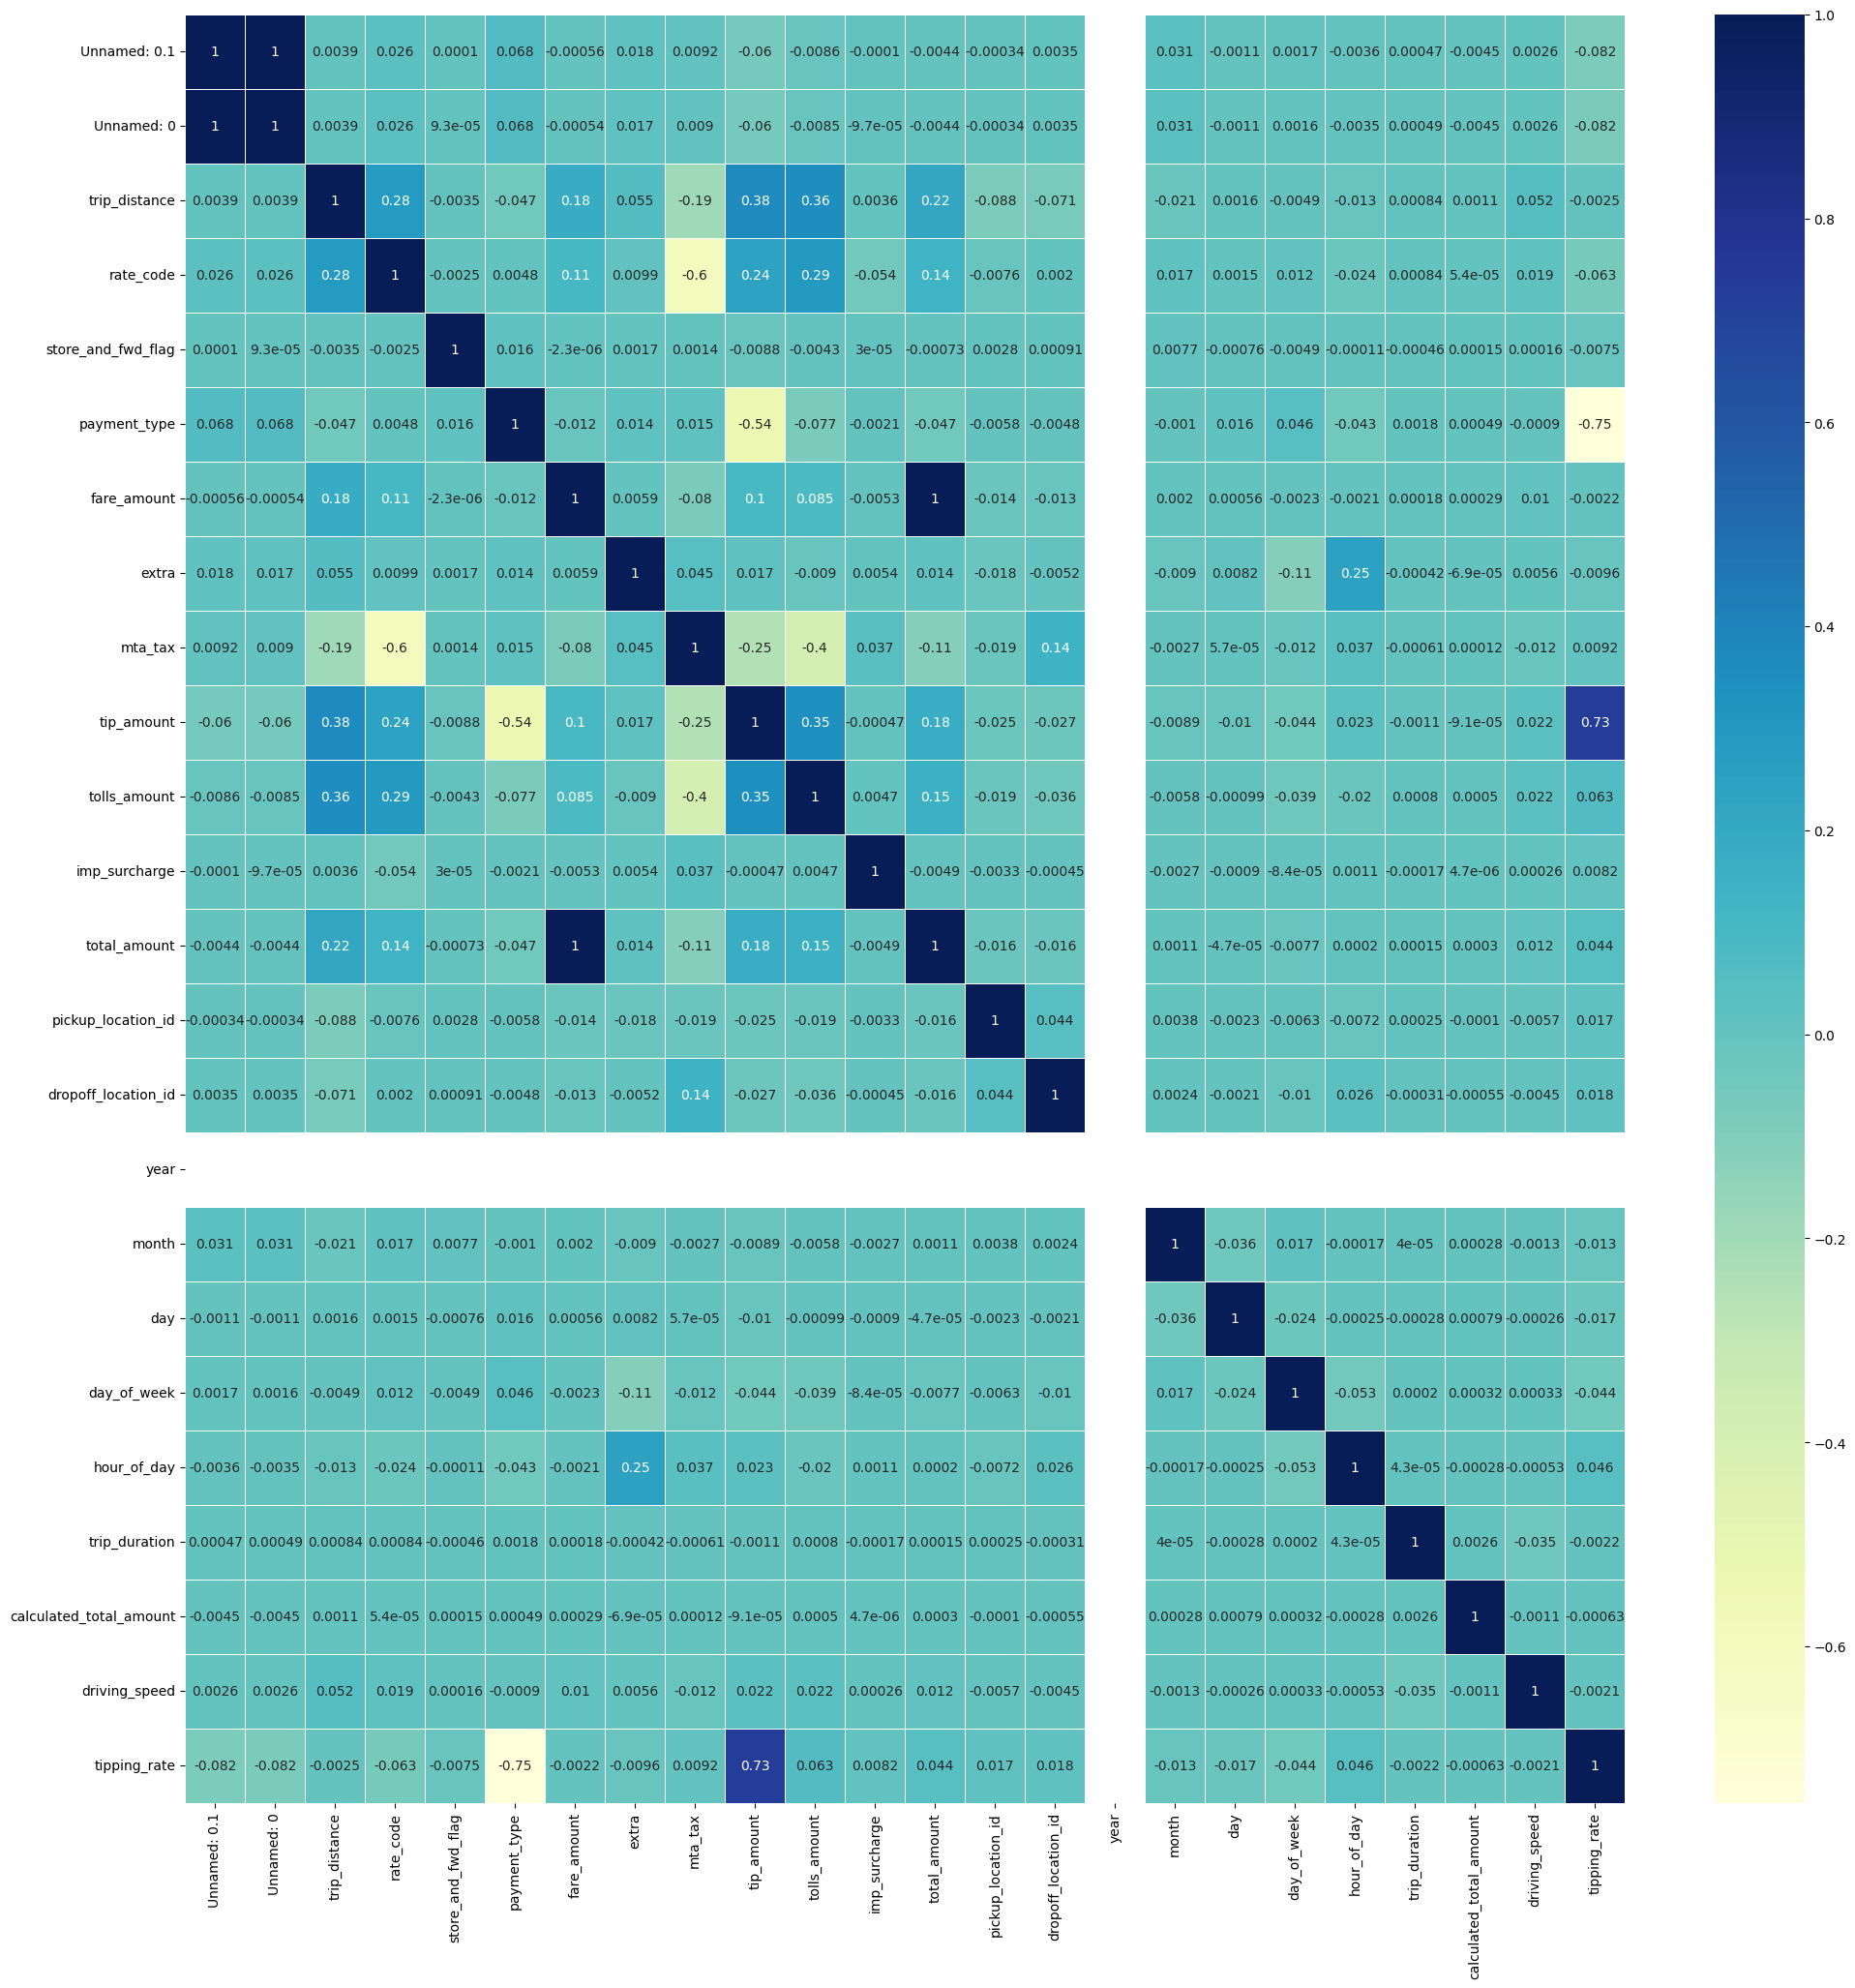

In [ ]:
corr = data.corr()
# Drawing the heatmap
col = data.shape[1]
fig, ax = plt.subplots(figsize=(col,col))
ax = sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=0.5);

In [ ]:
target = data['total_amount']
features = data[['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'driving_speed', 'tipping_rate']]

# Implementation des algorithmes:
nous choisis

## Importations des bibliothèques

In [ ]:
import time
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix

# Supposons que 'features' contient vos caractéristiques et 'target' contient votre variable cible
# Assurez-vous d'avoir des données d'entraînement (X_train, y_train) et de test (X_test, y_test)

# Division de l'ensemble de données
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

---
---
* ## LighBoost Algo

In [ ]:
# LightGBM
# Création du jeu de données LightGBM
train_data_lgb = lgb.Dataset(X_train, label=y_train)
test_data_lgb = lgb.Dataset(X_test, label=y_test, reference=train_data_lgb)

# Paramètres du modèle LightGBM
params_lgb = {
    'objective': 'regression',  # Type de tâche (régression dans cet exemple)
    'metric': 'rmse',  # Métrique d'évaluation (RMSE dans cet exemple)
    'boosting_type': 'gbdt',  # Type de boosting (Gradient Boosting Decision Tree)
    'num_leaves': 31,  # Nombre maximum de feuilles par arbre
    'learning_rate': 0.05,  # Taux d'apprentissage
    'feature_fraction': 0.9,  # Fraction de caractéristiques à utiliser pour chaque arbre
    'bagging_fraction': 0.8,  # Fraction de données à utiliser pour chaque arbre
    'bagging_freq': 5,  # Fréquence de bagging
    'verbose': 0,  # Niveau de détails des messages pendant l'entraînement (0 pour aucun message)
}

In [ ]:
# Entraînement du modèle LightGBM
num_round_lgb = 100

start_time = time.time()

lgb_model = lgb.train(params_lgb, train_data_lgb, num_round_lgb, valid_sets=[train_data_lgb, test_data_lgb])

training_time_lgb = time.time() - start_time

In [ ]:
# Prédiction LightGBM
start_time = time.time()

lgb_predictions = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

testing_time_lgb = time.time() - start_time

In [ ]:
confusion_matrix = confusion_matrix(y_test, lgb_predictions)

plt.imshow(confusion_matrix, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

ValueError: continuous is not supported

*  # XGBoost

In [ ]:
# Paramètres du modèle XGBoost
params_xgb = {
    'objective': 'reg:squarederror',  # Type de tâche (régression dans cet exemple)
    'eval_metric': 'rmse',  # Métrique d'évaluation (RMSE dans cet exemple)
    'booster': 'gbtree',  # Type de boosting (Gradient Boosting Tree)
    'learning_rate': 0.05,  # Taux d'apprentissage
    'colsample_bytree': 0.9,  # Fraction de caractéristiques à utiliser pour chaque arbre
    'subsample': 0.8,  # Fraction de données à utiliser pour chaque arbre
    'verbose': 0,  # Niveau de détails des messages pendant l'entraînement (0 pour aucun message)
}

In [ ]:
# Entraînement du modèle XGBoost
start_time = time.time()

xgb_model = xgb.XGBRegressor(**params_xgb)
xgb_model.fit(X_train, y_train)

training_time_xgb = time.time() - start_time

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:43:07] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Prédiction XGBoost
start_time = time.time()

xgb_predictions = xgb_model.predict(X_test)

testing_time_xgb = time.time() - start_time

*  # CatBoost

In [ ]:
# Paramètres du modèle CatBoost
params_catboost = {
    'loss_function': 'RMSE',  # Type de tâche (régression dans cet exemple)
    'eval_metric': 'RMSE',  # Métrique d'évaluation (RMSE dans cet exemple)
    'learning_rate': 0.05,  # Taux d'apprentissage
    'depth': 6,  # Profondeur de l'arbre
    'l2_leaf_reg': 3,  # Régularisation L2
    'verbose': 0,  # Niveau de détails des messages pendant l'entraînement (0 pour aucun message)
}

In [ ]:
# Entraînement du modèle CatBoost
start_time = time.time()

catboost_model = CatBoostRegressor(**params_catboost)
catboost_model.fit(X_train, y_train)

training_time_cat = time.time() - start_time

In [ ]:
# Prédiction CatBoost
start_time = time.time()

catboost_predictions = catboost_model.predict(X_test)

testing_time_cat = time.time() - start_time

# Mesures de perforances

In [ ]:

train_time_values

[2.1991922656695047, 2.1991922656695047, 16.326804474989572]

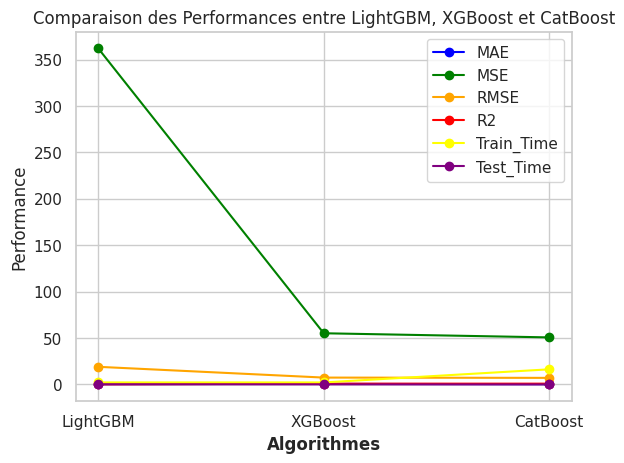

In [ ]:
# Mean Absolute Error (MAE)
mae_lgb = mean_absolute_error(y_test, lgb_predictions)
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
mae_catboost = mean_absolute_error(y_test, catboost_predictions)

# Mean Squared Error (MSE)
mse_lgb = mean_squared_error(y_test, lgb_predictions)
mse_xgb = mean_squared_error(y_test, xgb_predictions)
mse_catboost = mean_squared_error(y_test, catboost_predictions)

#Root Mean Squared Error (RMSE)
rmse_lgb = mean_squared_error(y_test, lgb_predictions, squared=False)
rmse_xgb = mean_squared_error(y_test, xgb_predictions, squared=False)
rmse_catboost = mean_squared_error(y_test, catboost_predictions, squared=False)

#Coefficient de détermination (R2)
r2_lgb = r2_score(y_test, lgb_predictions)
r2_xgb = r2_score(y_test, xgb_predictions)
r2_catboost = r2_score(y_test, catboost_predictions)

labels = ['LightGBM', 'XGBoost', 'CatBoost']
mae_values = [mae_lgb, mae_xgb, mae_catboost]
mse_values = [mse_lgb, mse_xgb, mse_catboost]
rmse_values = [rmse_lgb, rmse_xgb, rmse_catboost]
r2_values = [r2_lgb, r2_xgb, r2_catboost]
train_time_values = [training_time_lgb/60, training_time_lgb/60, training_time_cat/60]
test_time_values = [testing_time_lgb/60, testing_time_xgb/60, testing_time_cat/60]

# Création du graphique en linechart
plt.plot(labels, mae_values, marker='o', linestyle='-', color='blue', label='MAE')
plt.plot(labels, mse_values, marker='o', linestyle='-', color='green', label='MSE')
plt.plot(labels, rmse_values, marker='o', linestyle='-', color='orange', label='RMSE')
plt.plot(labels, r2_values, marker='o', linestyle='-', color='red', label='R2')
plt.plot(labels, train_time_values, marker='o', linestyle='-', color='yellow', label='Train_Time')
plt.plot(labels, test_time_values, marker='o', linestyle='-', color='purple', label='Test_Time')

# Personnalisation du graphique
plt.xlabel('Algorithmes', fontweight='bold')
plt.ylabel('Performance')
plt.title('Comparaison des Performances entre LightGBM, XGBoost et CatBoost')
plt.legend()
plt.grid(True)

# Affichage du graphique
plt.show()

# Interprétation des résultats

Les résultats montrent que CatBoost est le meilleur algorithme, avec les meilleures performances en termes de MAE, MSE, RMSE et R2. XGBoost est en deuxième position, suivi de LightGBM.

Les temps d'entraînement et de test sont également les meilleurs pour LightGBM, ce qui le rend plus adapté aux modèles de grande taille.

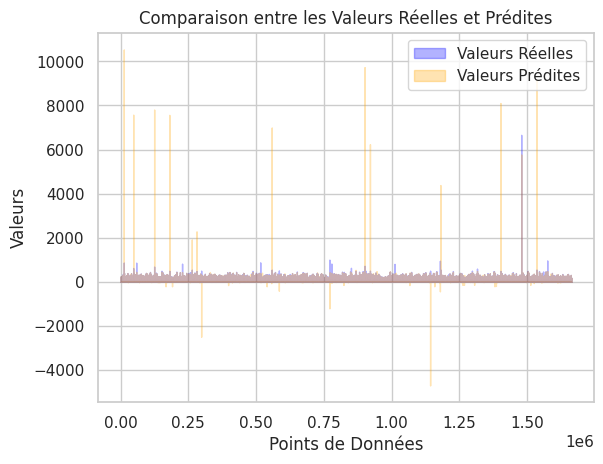

In [ ]:
# Création d'un tableau d'indices pour l'axe des x
indices = np.arange(len(y_test))

# Configuration du style Seaborn
sns.set(style="whitegrid")

# Tracé du graphique à aires
plt.fill_between(indices, y_test, color='blue', alpha=0.3, label='Valeurs Réelles')
plt.fill_between(indices, lgb_predictions, color='orange', alpha=0.3, label='Valeurs Prédites')

# Ajout des étiquettes et du titre
plt.xlabel('Points de Données')
plt.ylabel('Valeurs')
plt.title('Comparaison entre les Valeurs Réelles et Prédites pour l\'algorithmes LightBoost')

# Ajout d'une légende
plt.legend()

# Affichage du graphique
plt.show()


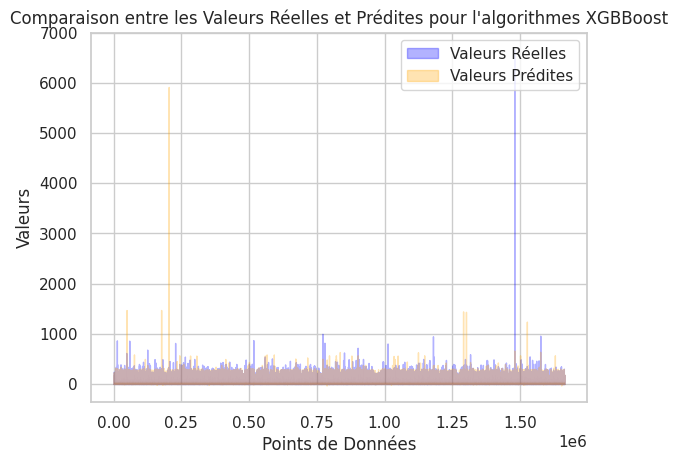

In [ ]:
# Création d'un tableau d'indices pour l'axe des x
indices = np.arange(len(y_test))

# Configuration du style Seaborn
sns.set(style="whitegrid")

# Tracé du graphique à aires
plt.fill_between(indices, y_test, color='blue', alpha=0.3, label='Valeurs Réelles')
plt.fill_between(indices, xgb_predictions, color='orange', alpha=0.3, label='Valeurs Prédites')

# Ajout des étiquettes et du titre
plt.xlabel('Points de Données')
plt.ylabel('Valeurs')
plt.title('Comparaison entre les Valeurs Réelles et Prédites pour l\'algorithmes XGBBoost')

# Ajout d'une légende
plt.legend()

# Affichage du graphique
plt.show()


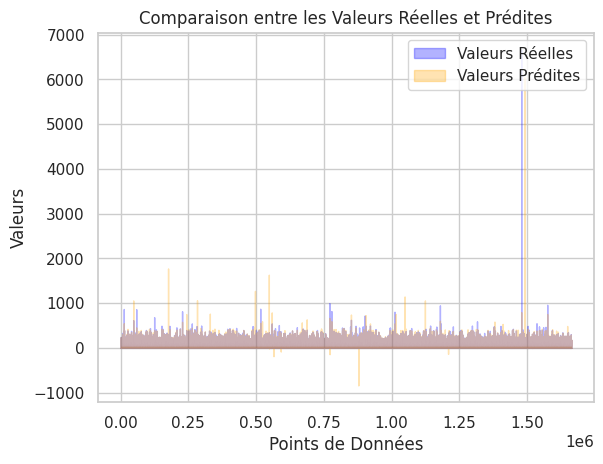

In [ ]:
# Création d'un tableau d'indices pour l'axe des x
indices = np.arange(len(y_test))

# Configuration du style Seaborn
sns.set(style="whitegrid")

# Tracé du graphique à aires
plt.fill_between(indices, y_test, color='blue', alpha=0.3, label='Valeurs Réelles')
plt.fill_between(indices, catboost_predictions, color='orange', alpha=0.3, label='Valeurs Prédites')

# Ajout des étiquettes et du titre
plt.xlabel('Points de Données')
plt.ylabel('Valeurs')
plt.title('Comparaison entre les Valeurs Réelles et Prédites pour l\'algorithmes CatBoost')

# Ajout d'une légende
plt.legend()

# Affichage du graphique
plt.show()
